<a href="https://colab.research.google.com/github/israellmorais/ReconhecimentodePadroes/blob/main/Ambiente_Desenvolvimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercício Aula 2 - Regressão

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pylab as plt

#url = '/content/winequality-white.csv'
url = '/content/drive/My Drive/ReconhecimentoPadroes/Regressao (1)/winequality-white.csv'

df = pd.read_csv(url)
#df.info()

X = df.iloc[:,0:11] 
y = df.iloc[:,11:12]

X = X.to_numpy()
y = y.to_numpy()

def rmse(y, ypred):
  yDiff = ypred - y.reshape(-1,1)
  yDiffSquare = yDiff**2
  errorSum = sum(yDiffSquare)
  mse = errorSum/len(yDiffSquare)
  return sqrt(mse)

def modelo_linear(X, a, b):
  y = a*X + b
  return y

class regressao_linear():
  def __init__(self):
    self.w = np.zeros((2,1))

  @staticmethod
  def addBias(X):
     bias = np.ones((X.shape[0],1))
     X_b = np.concatenate((bias,X),axis=1)
     return X_b

  def fit(self,X,y):
    X_b = self.addBias(X)
    for _ in range(500):
      ypred = self.predict(X)
      erro = ypred - y.reshape(-1,1)
      ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)
      self.w = self.w - 0.1*ajuste
      
  
  def predict(self, X):
    X_b = self.addBias(X)
    y = X_b.dot(self.w)
    return y
  

#modelo.w

0


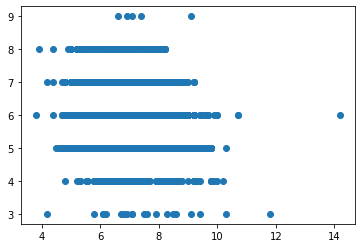

1


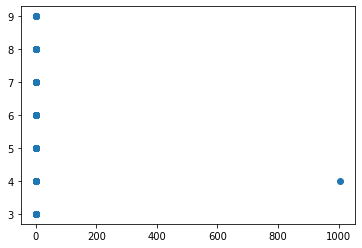

2


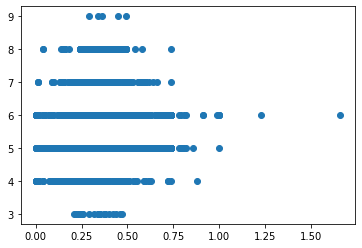

3


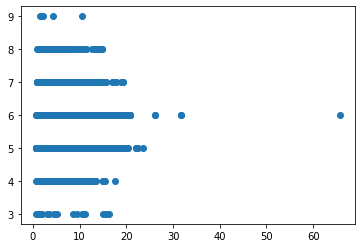

4


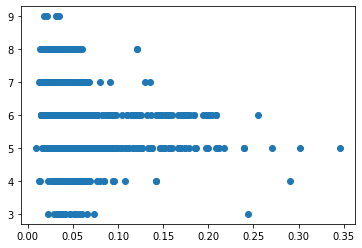

5


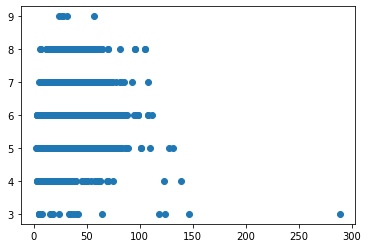

6


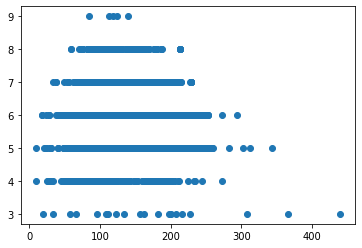

7


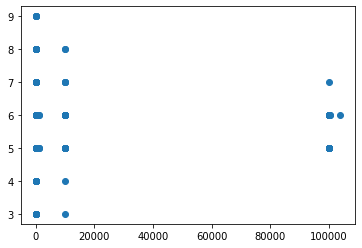

8


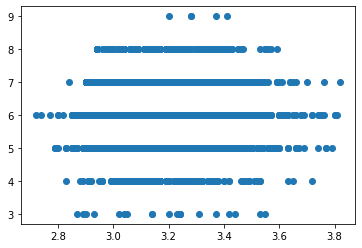

9


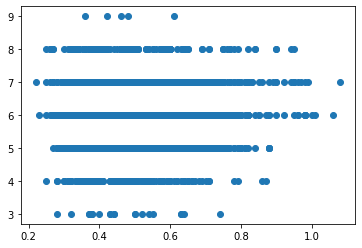

10


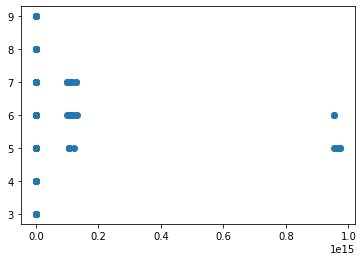

In [30]:
import matplotlib.pylab as plt
for i in range(X.shape[1]):
  print(i)
  plt.scatter(X[:,i],y)
  plt.show()

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X,y)
ypredaux = model.predict(X)


print('Intercept\n', model.intercept_, '\n\nCoef\n', model.coef_)
mseaux = mean_squared_error(y,ypredaux)
print('\n\nMSE = ', mseaux)

Intercept
 [5.86150832] 

Coef
 [[-7.31701468e-02 -1.47592722e-03  3.71323706e-01 -4.11190924e-03
  -7.19935589e+00  8.92156480e-03 -5.07924154e-03  1.70850346e-07
   2.77413565e-01  5.19136246e-01 -3.84024409e-16]]


MSE =  0.7055625093647742


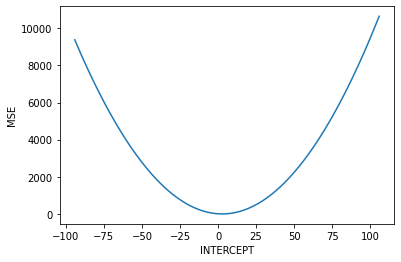

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

#w0 = np.linspace(33,36,30)
w0 = np.linspace(model.intercept_ - 100,model.intercept_ + 100,100)
w1 = np.linspace(1,1,100)
#w1 = np.linspace(model.coef_,model.coef_,30)

X1 =  df.iloc[:,8:9]

def z_function(W0, W1):
  modelo = regressao_linear()
  Erro = np.empty(W0.shape)
  for j in range(Erro.shape[0]):
    for k in range(Erro.shape[1]):
        modelo.w[0] = W0[j][k]
        modelo.w[1] = W1[j][k]
        ypred = modelo.predict(X1)
        mse = mean_squared_error(y, ypred)
        Erro[j][k] = mse
  return Erro

W0,W1 = np.meshgrid(w0,w1)
Erro = z_function(W0,W1)

plt.ylabel("MSE")
plt.xlabel("INTERCEPT")
i=8
plt.plot(W0[i,:],Erro[i,:])
plt.show()

#Exercício Semana 1 - Ambiente de Desenvolvimento

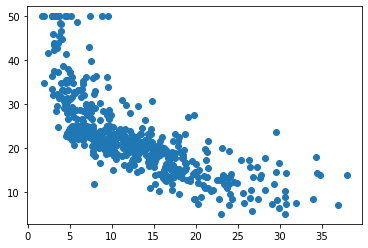

In [ ]:
#Regressão
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
plt.scatter(X[:,12],y)
plt.show()

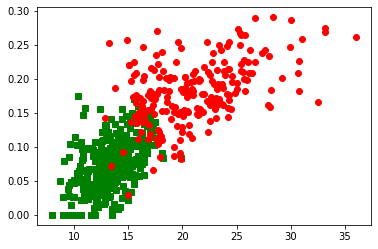

In [ ]:
#Classificação
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
plt.plot(X[:, 20][y==1], X[:, 27][y==1], "gs")
plt.plot(X[:, 20][y==0], X[:, 27][y==0], "ro")
plt.show()

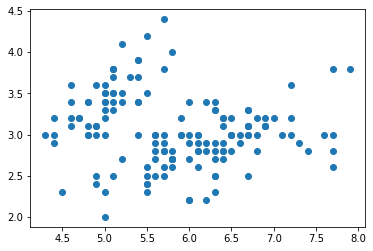

In [ ]:
#Aprendizado não supervisionado
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
plt.plot(X[:, 0], X[:, 1], "o")
plt.show()